## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
sns.__version__

'0.13.2'

In [5]:
# Tell Python to remember a main folder path
path = r'C:\Users\Frederick\Documents\CareerFoundry\CF - Data Analytics Immersion\Achievement6\05-2024 World Happiness Report'

In [6]:
# import 2019 data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','2019_checked.csv'), index_col = False)

In [7]:
df.shape

(156, 10)

In [8]:
df.head()

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
# Drop column 
df = df.drop(columns=['Country or region'])

### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

[-632955.5869934103,
 -158327.70638260563,
 -70389.7695554808,
 -39606.539513056916,
 -25365.12487235067,
 -17636.45751661641,
 -12976.152296239226,
 -9984.666541557479,
 -7846.812482185458]

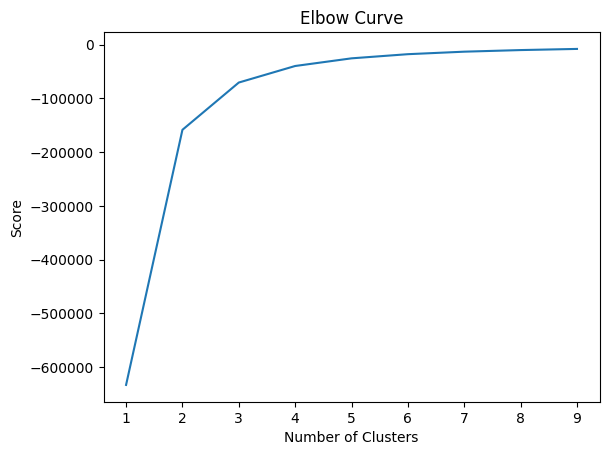

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is three.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Frederick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
df.head()

,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,clusters
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [17]:
df['clusters'].value_counts()

clusters
1    52
0    52
2    52
Name: count, dtype: int64

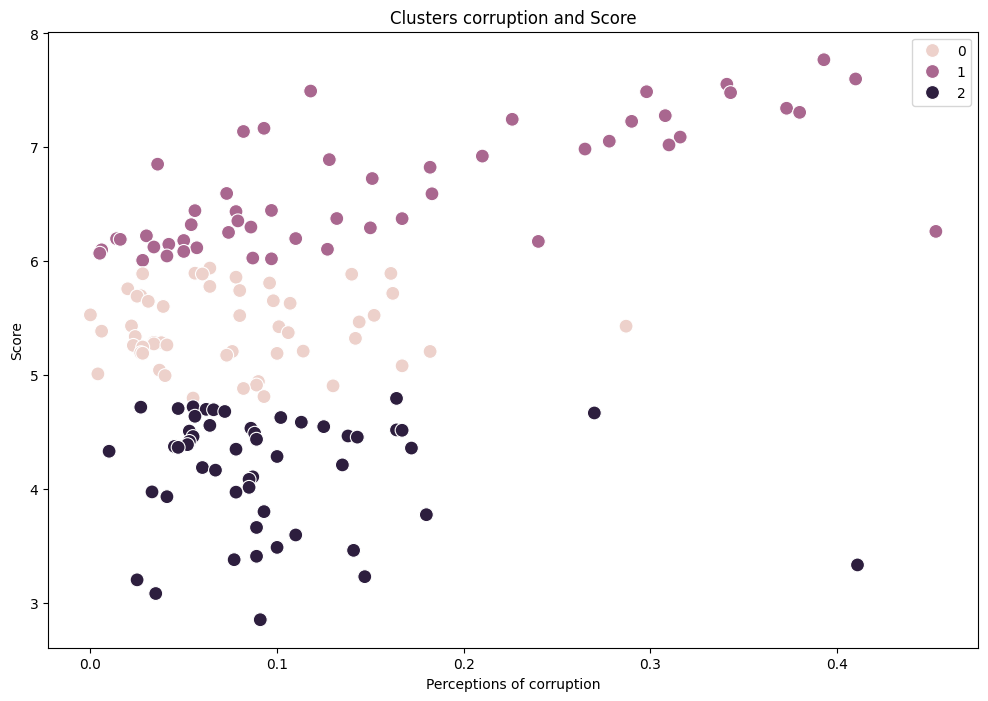

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Perceptions of corruption'], y=df['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Perceptions of corruption') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.title('Clusters corruption and Score')
plt.show()

#### The clusters here show that less corruption has a big impact on the Happiness Scores as this shows on every level of the Happiness scores,, high medium or low, but it is always the case. One cluster shows that regardless of high or low corruption it, doesn't really matter in the higher Happiness scores. 

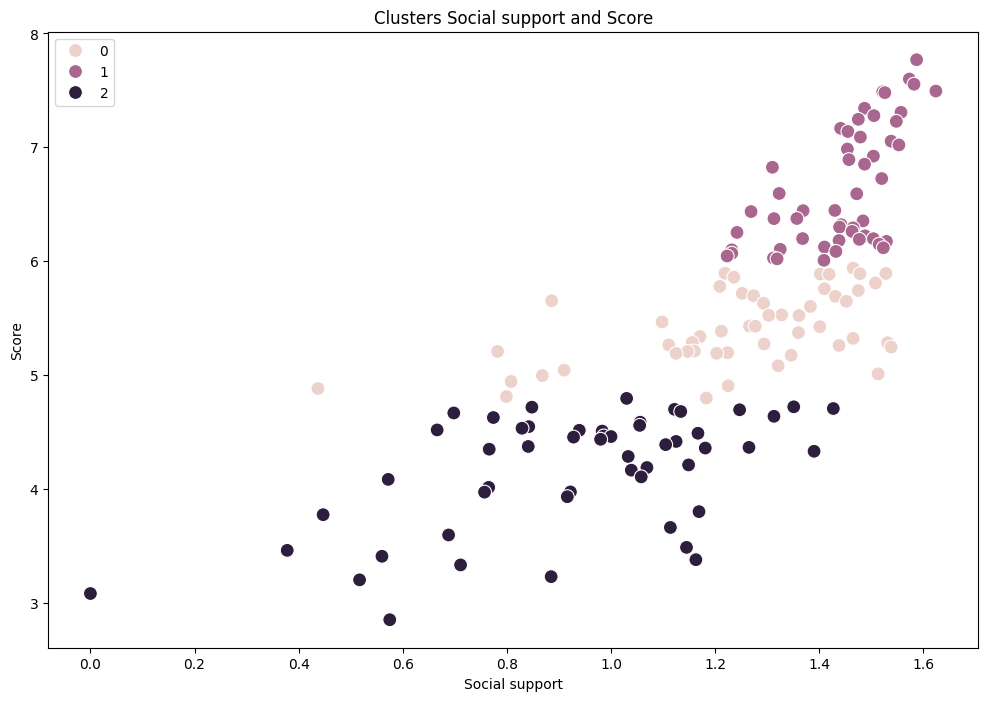

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social support'], y=df['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.title('Clusters Social support and Score')
plt.savefig('happiness_clusters1.png')
plt.show()

#### These clusters make sense as we see the bigger the Social support, the higher the Happiness scores are. The clusters show that there is a lower Happiness Score when there is lower social support. 

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df.groupby('cluster').agg({'Generosity':['mean', 'median'], 
                         'Perceptions of corruption':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                          'Score':['mean', 'median']})

Generosity         Perceptions of corruption          \
                  mean  median                      mean  median   
cluster                                                            
dark purple   0.202212  0.1920                  0.158596  0.1140   
pink          0.158423  0.1440                  0.076635  0.0685   
purple        0.193904  0.1925                  0.096577  0.0855   

            Social support             Score          
                      mean  median      mean  median  
cluster                                               
dark purple       1.442077  1.4640  6.644808  6.4400  
pink              1.248212  1.2755  5.406288  5.3795  
purple            0.936154  0.9845  4.170192  4.3630

The descriptive statistics reveal distinct differences among clusters in terms of generosity, perceptions of corruption, social support, and overall score. The dark purple cluster exhibits the highest mean score (6.64) and social support (1.44), indicating stronger social ties and better overall scores, but also shows higher perceived corruption (0.16) compared to the pink and purple clusters. Conversely, the pink cluster has the lowest mean perceptions of corruption (0.08) and the middle values in generosity and social support, whereas the purple cluster has the lowest scores in social support (0.94) and overall score (4.17), reflecting weaker social ties and overall wellbeing.

Next Step? Explore potential factors that might contribute to the observed differences between clusters. This could involve examining other variables within the dataset or external data sources to understand the underlying causes of higher social support and scores in the dark purple cluster compared to the others.